In [1]:
""" Interactive version of evaluate.py """

' Interactive version of evaluate.py '

In [2]:
import os
import evaluate
import argparse
import h5py
import numpy as np

import HighLevelFeatures as HLF

In [3]:
# emulating the argument parser of the evaluation script
parser_replacement = {
    'input_file': '../dataset_1_photons_1.hdf5', # Name of the input file to be evaluated.
    'mode': 'all', # One of ['all', 'avg', 'avg-E', 'hist-p', 'hist-chi', 'hist', 'cls-low', 'cls-high'].
    'dataset': '1-photons', # One of ['1-photons', '1-pions', '2', '3']. 
    'output_dir': 'evaluation_results/', # Where to store evaluation output files (plots and scores).
    'source_dir': 'source/', # Folder that contains (soft links to) files required for comparative evaluations.
}
args = argparse.Namespace(**parser_replacement)

In [4]:
# reading in source file
source_file = h5py.File(args.input_file, 'r')

# checking if it has correct shape
evaluate.check_file(source_file, args)

# preparing output directory
if not os.path.isdir(args.output_dir):
    os.makedirs(args.output_dir)

# extracting showers and energies from source file
shower, energy = evaluate.extract_shower_and_energy(source_file, args)

# creating helper class for high-level features
particle = {'1-photons': 'photon', '1-pions': 'pion',
            '2': 'electron', '3': 'electron'}[args.dataset]
hlf = HLF.HighLevelFeatures(particle, filename='binning_dataset_{}.xml'.format(args.dataset.replace('-', '_')))



Checking if provided file has the correct form ...
Found 121000 events in the file.
Checking if provided file has the correct form: DONE 

Extracting showers from file...
Extracting showers from file: DONE.



Plotting average shower...
Plotting average shower: DONE.



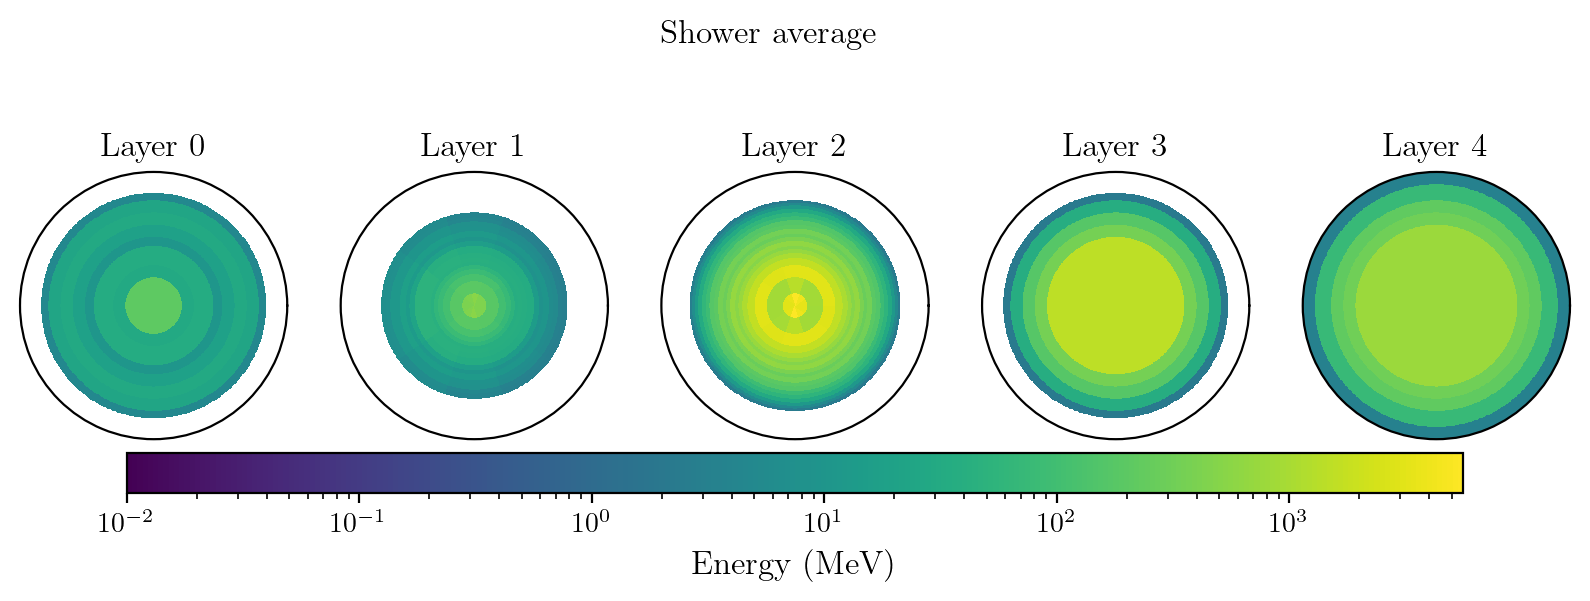

In [5]:
# evaluation mode 'avg': average of all showers
print("Plotting average shower...")
_ = hlf.DrawAverageShower(shower, filename=os.path.join(args.output_dir, 
                                                        'average_shower_dataset_{}.png'.format(args.dataset)),
                                  title="Shower average")
print("Plotting average shower: DONE.\n")


Plotting average showers for different energies ...
Plotting average shower for different energies: DONE.



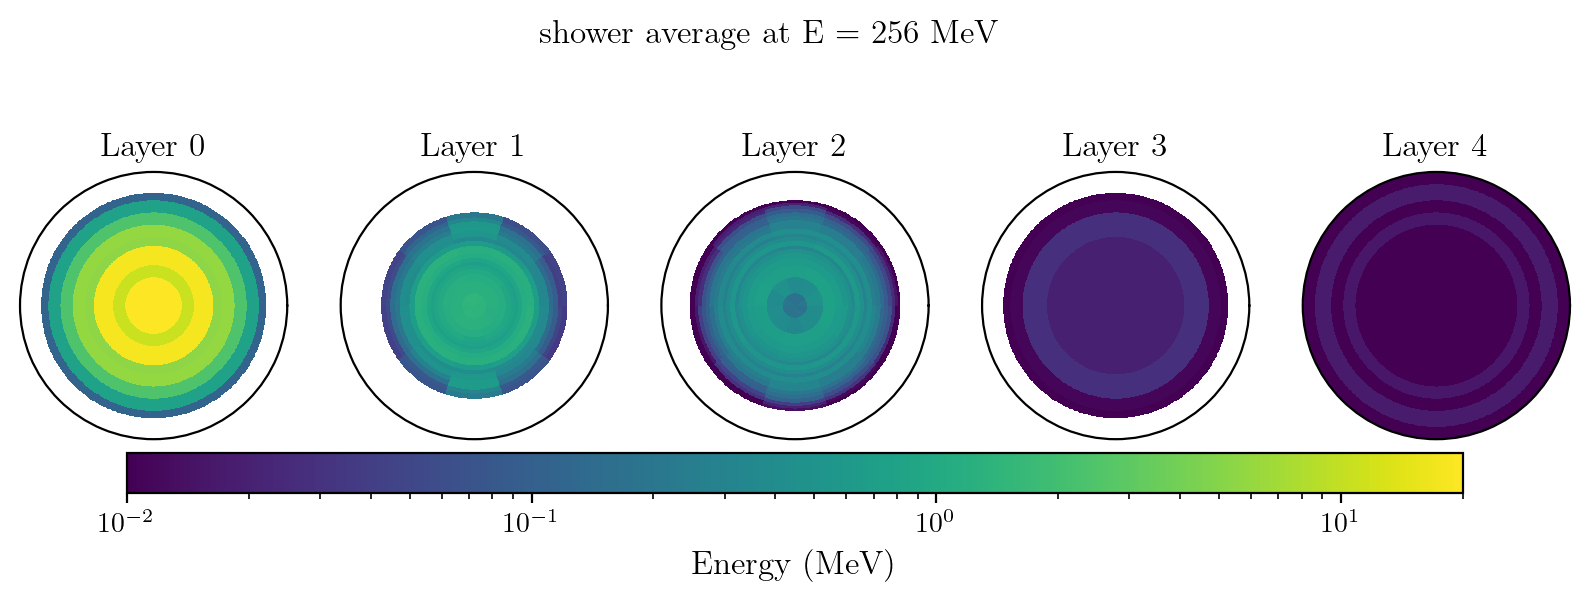

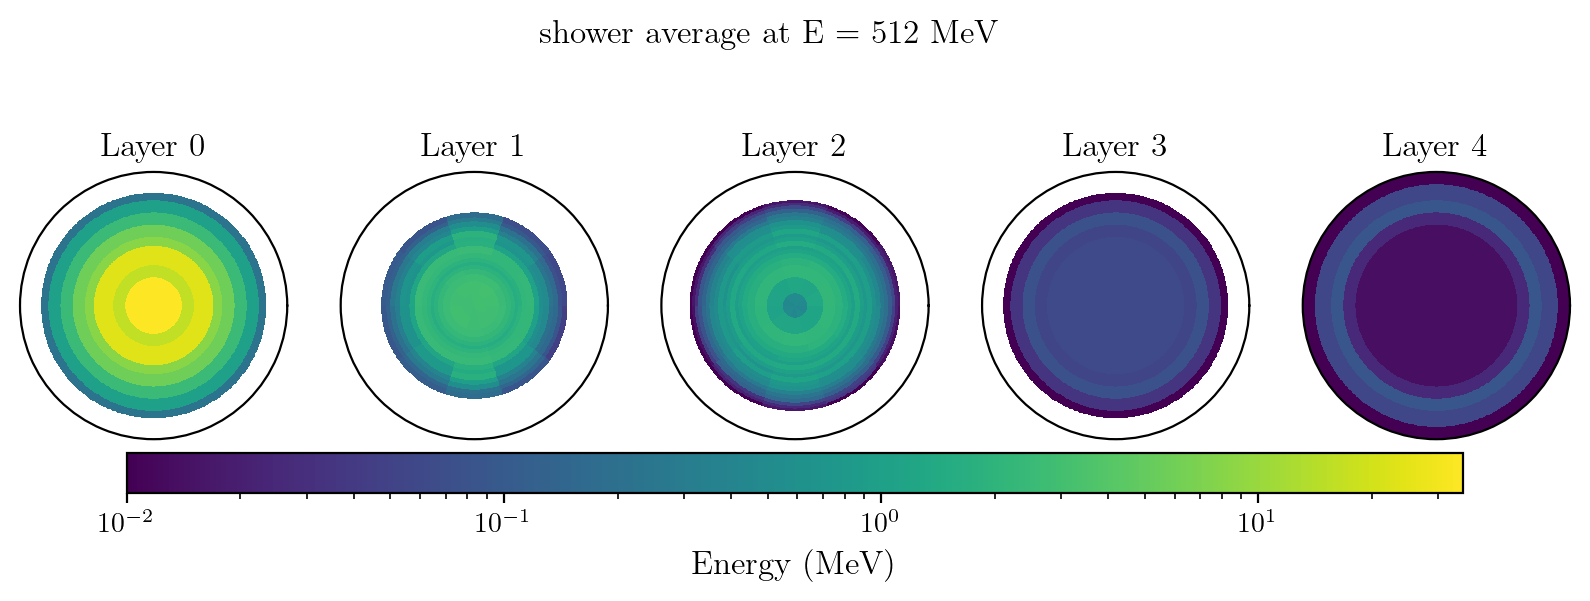

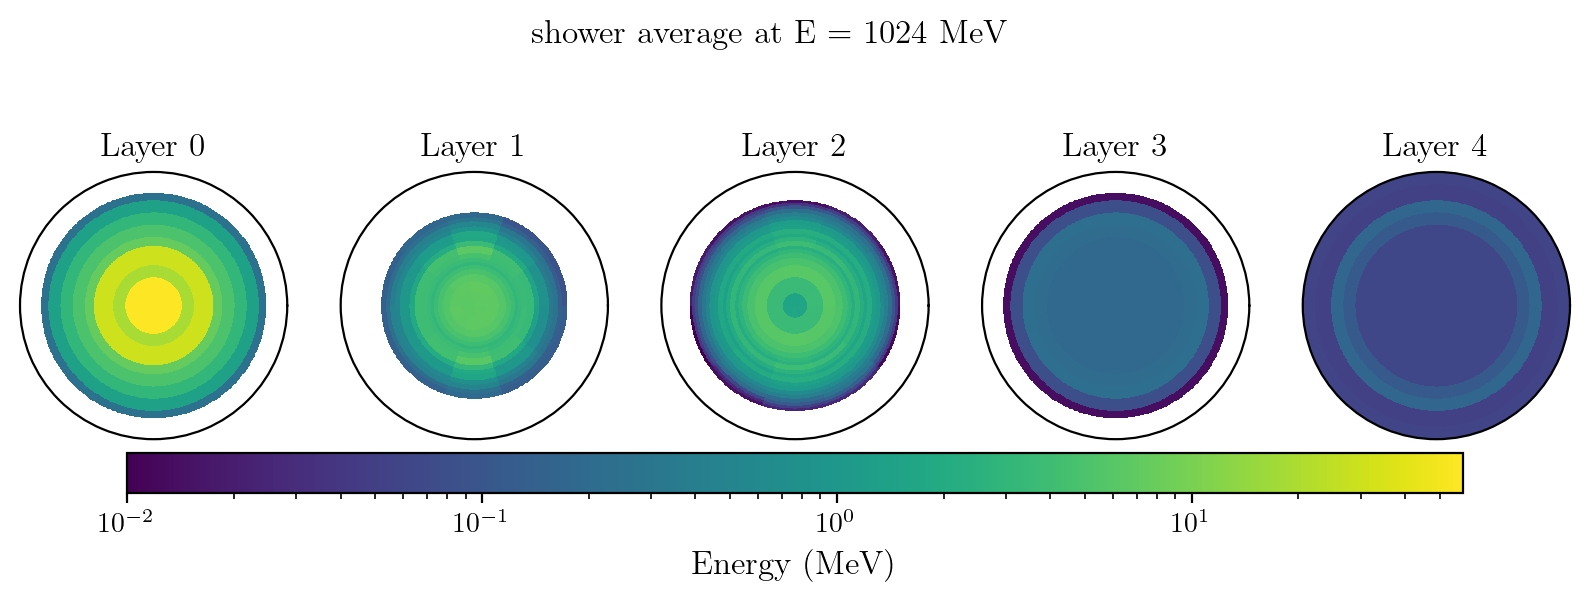

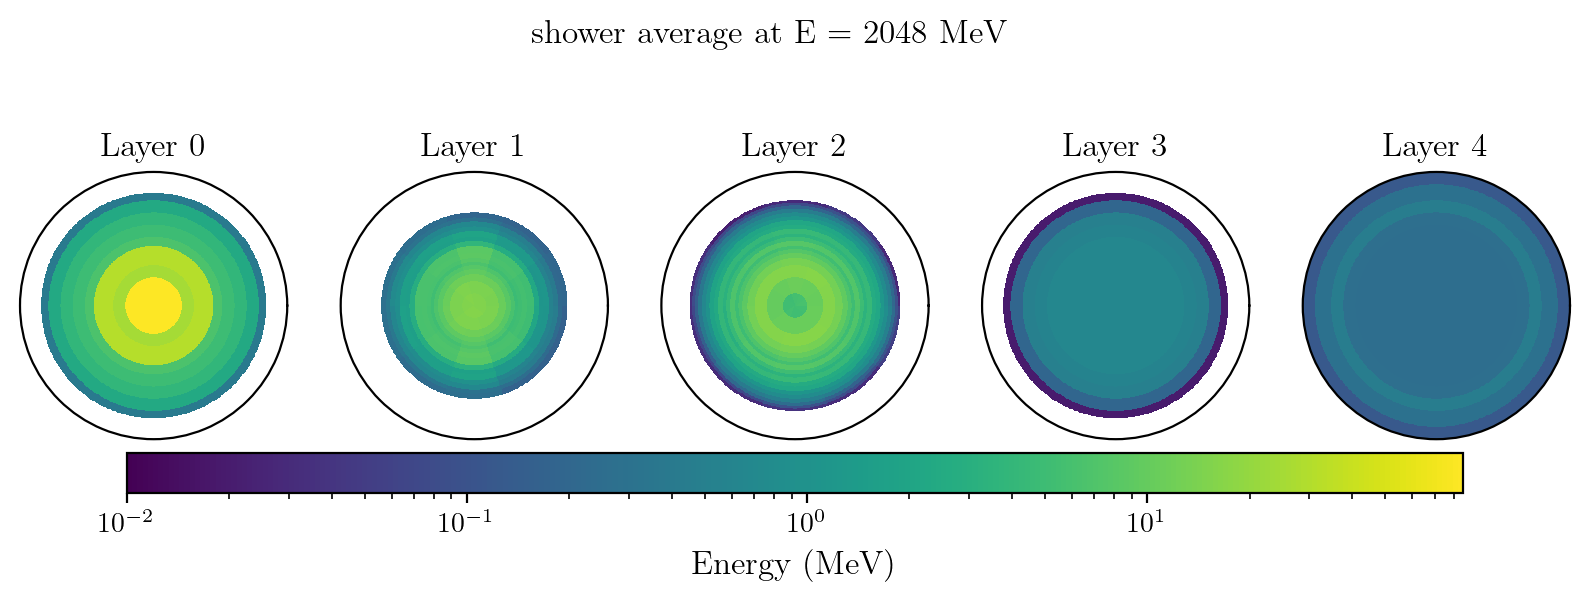

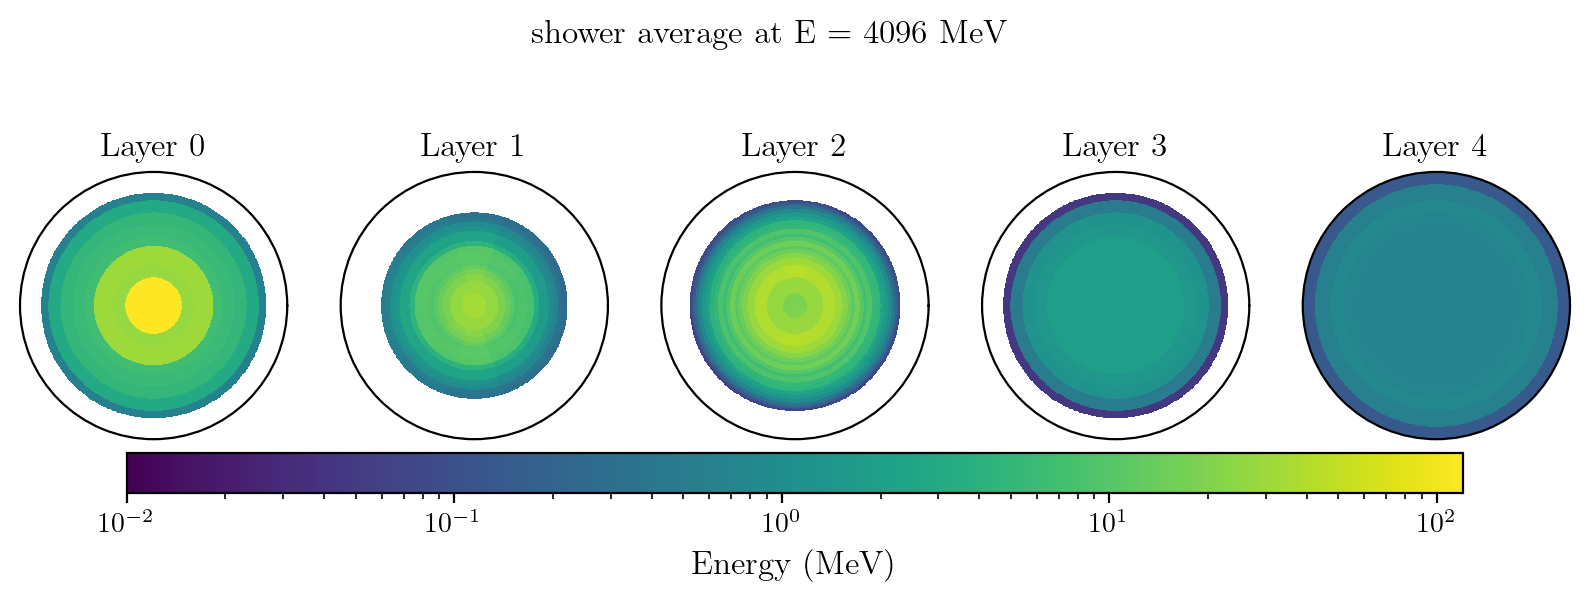

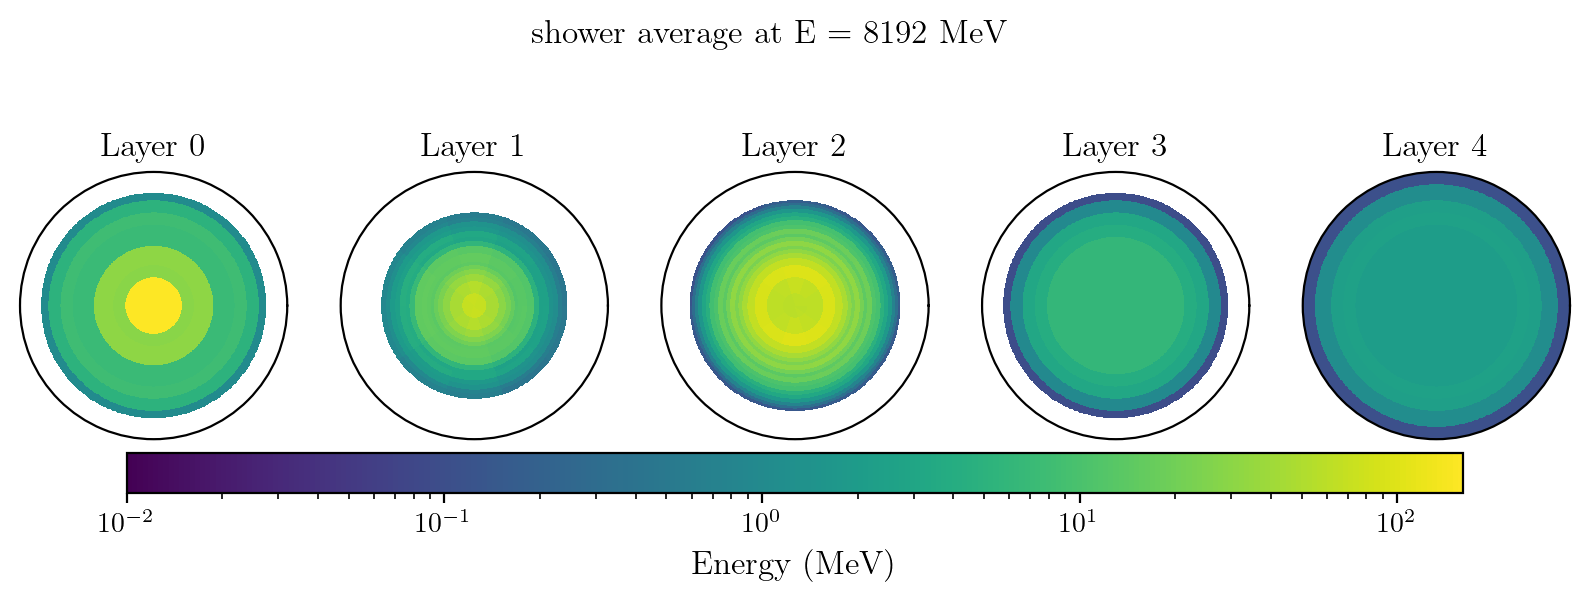

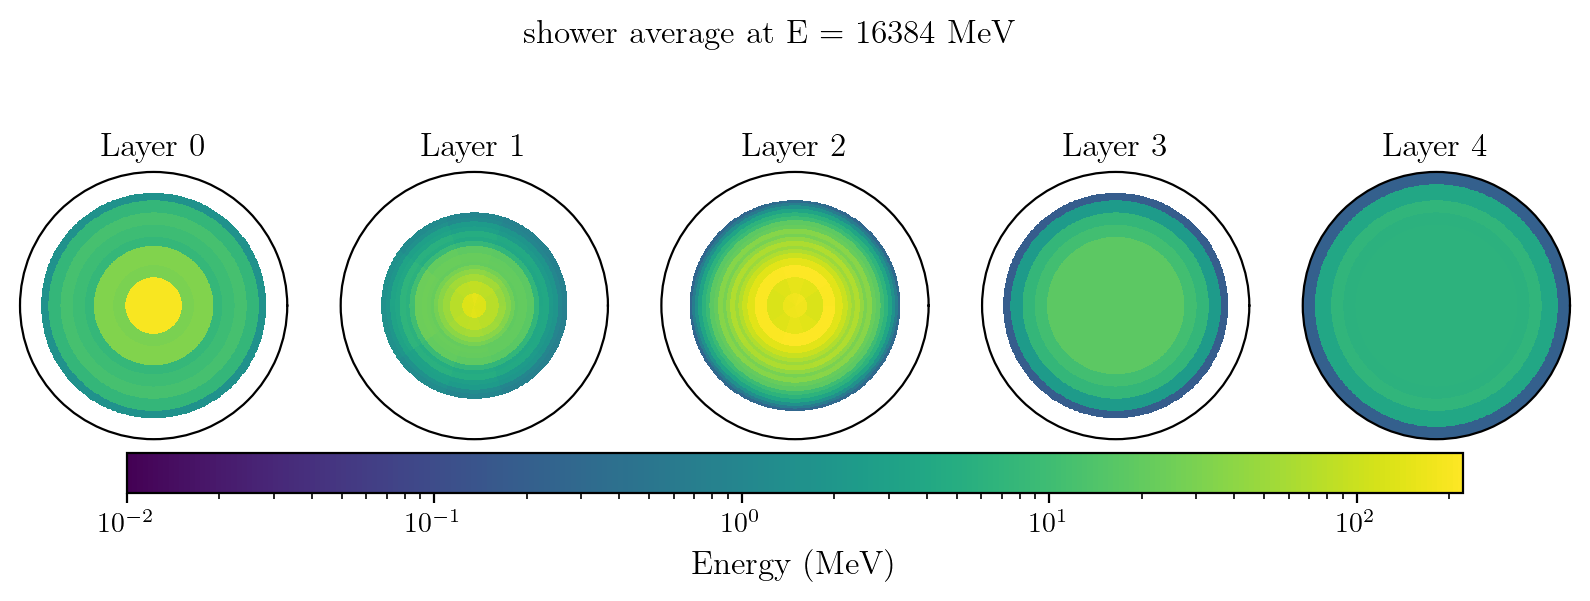

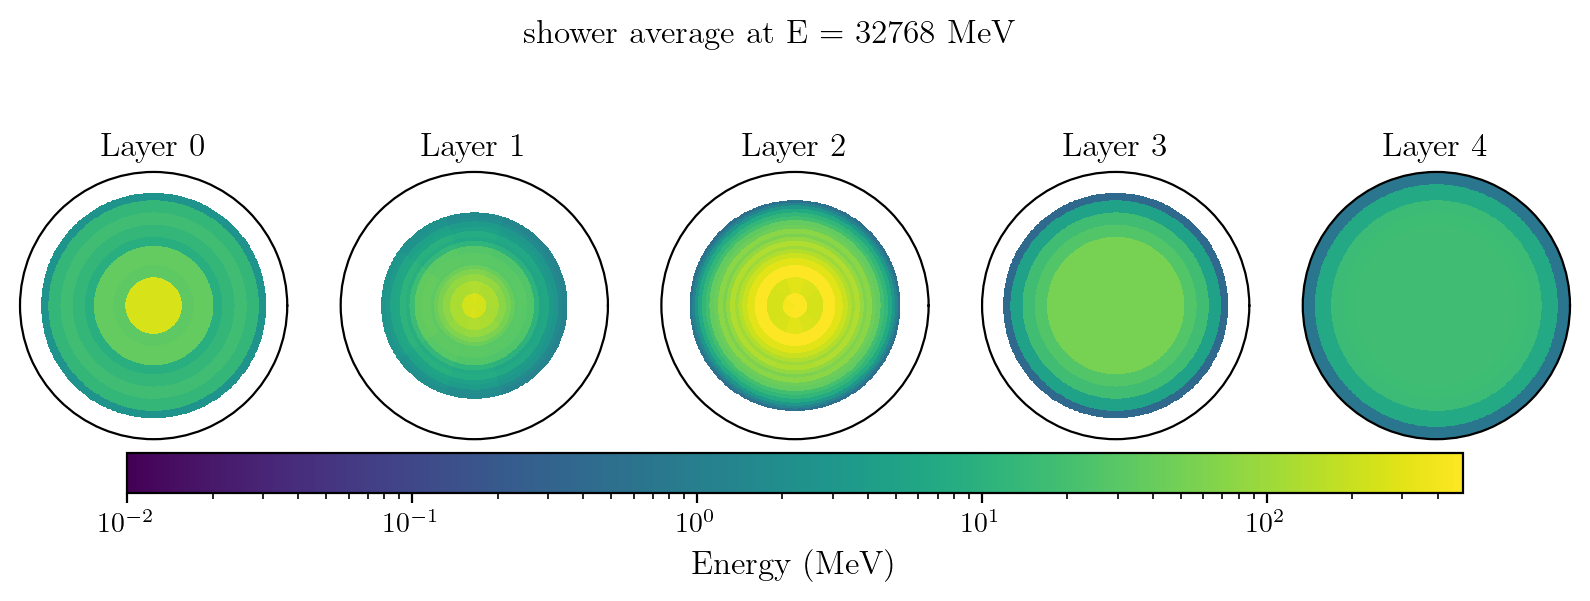

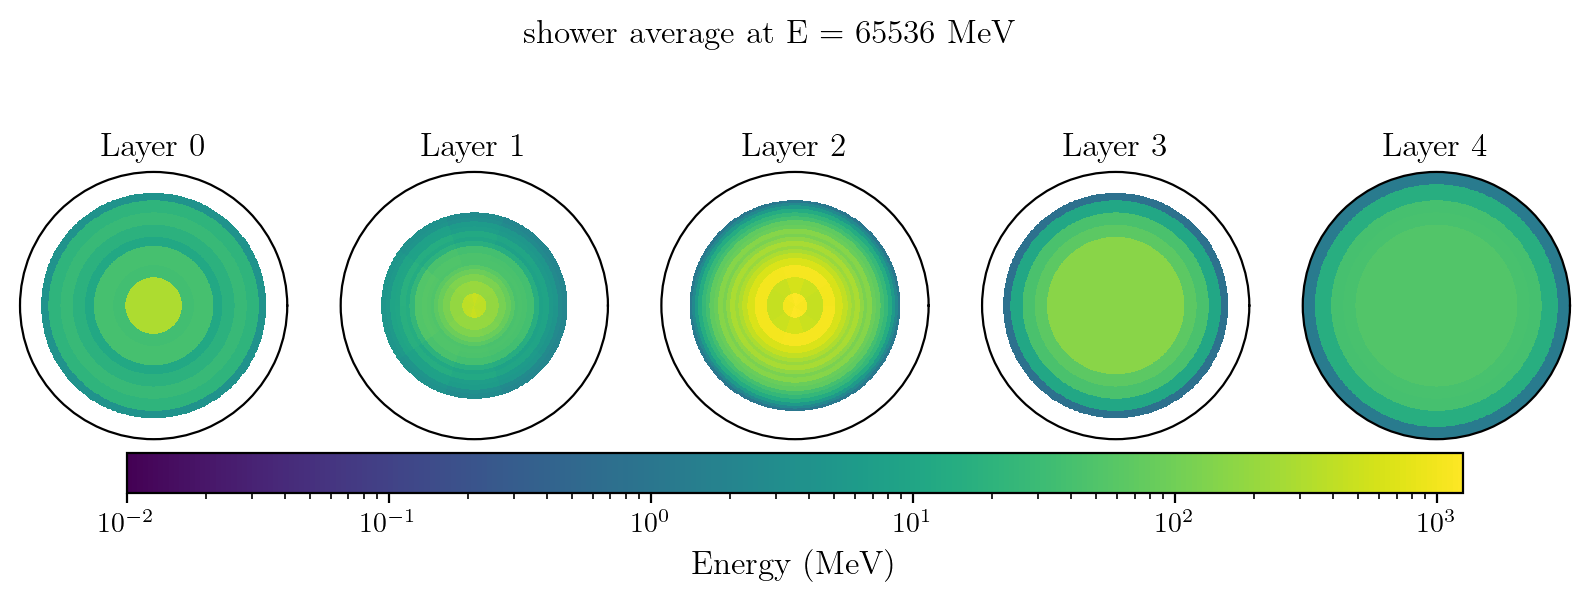

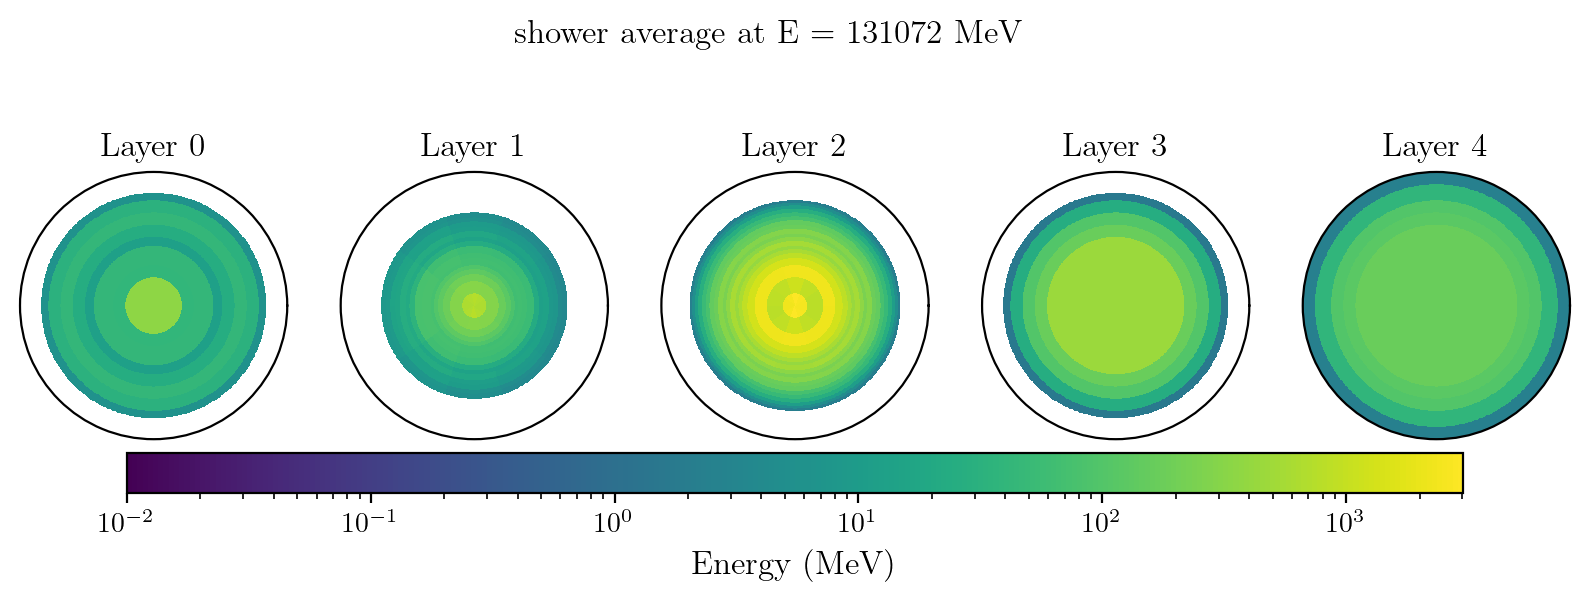

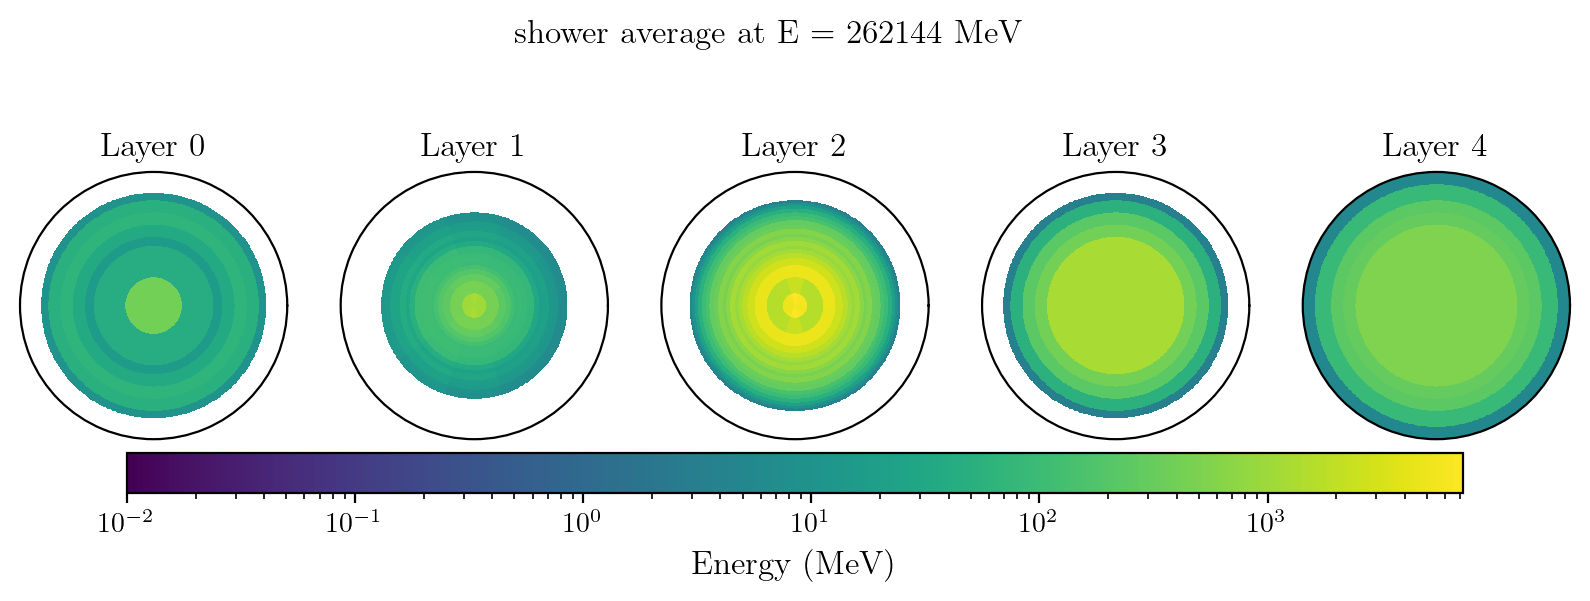

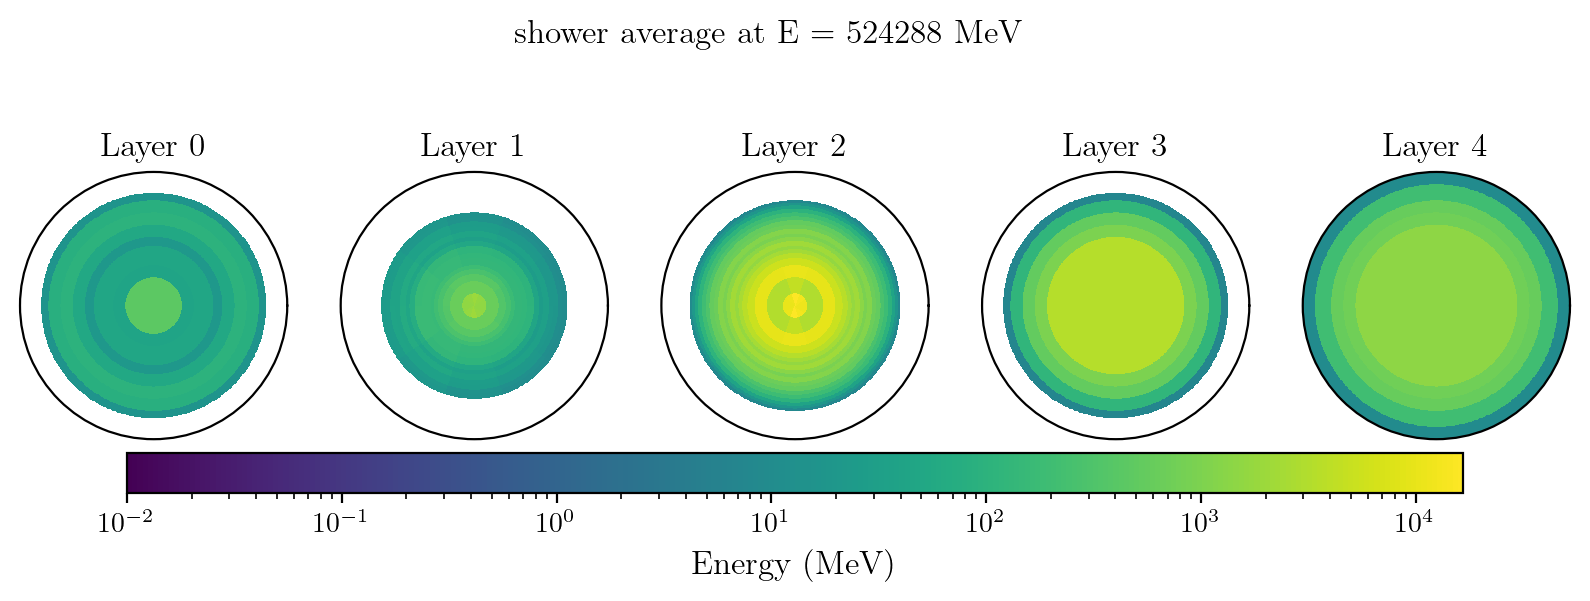

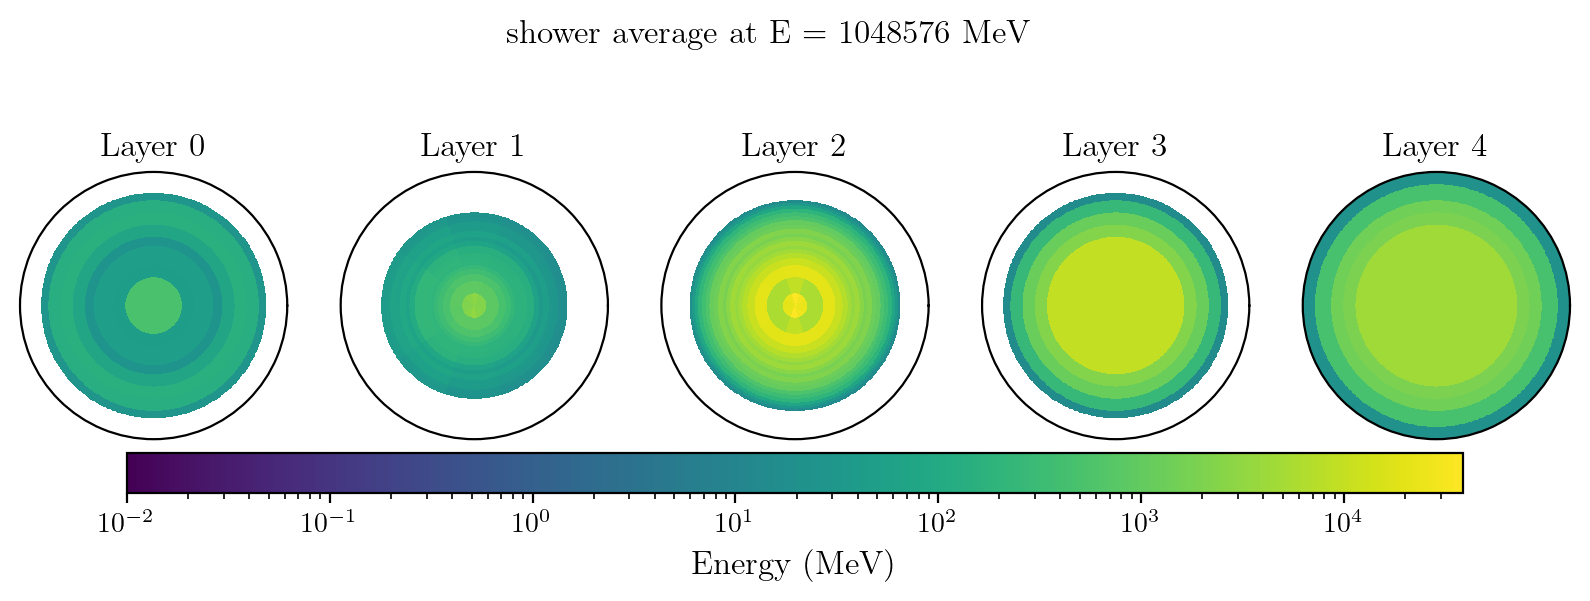

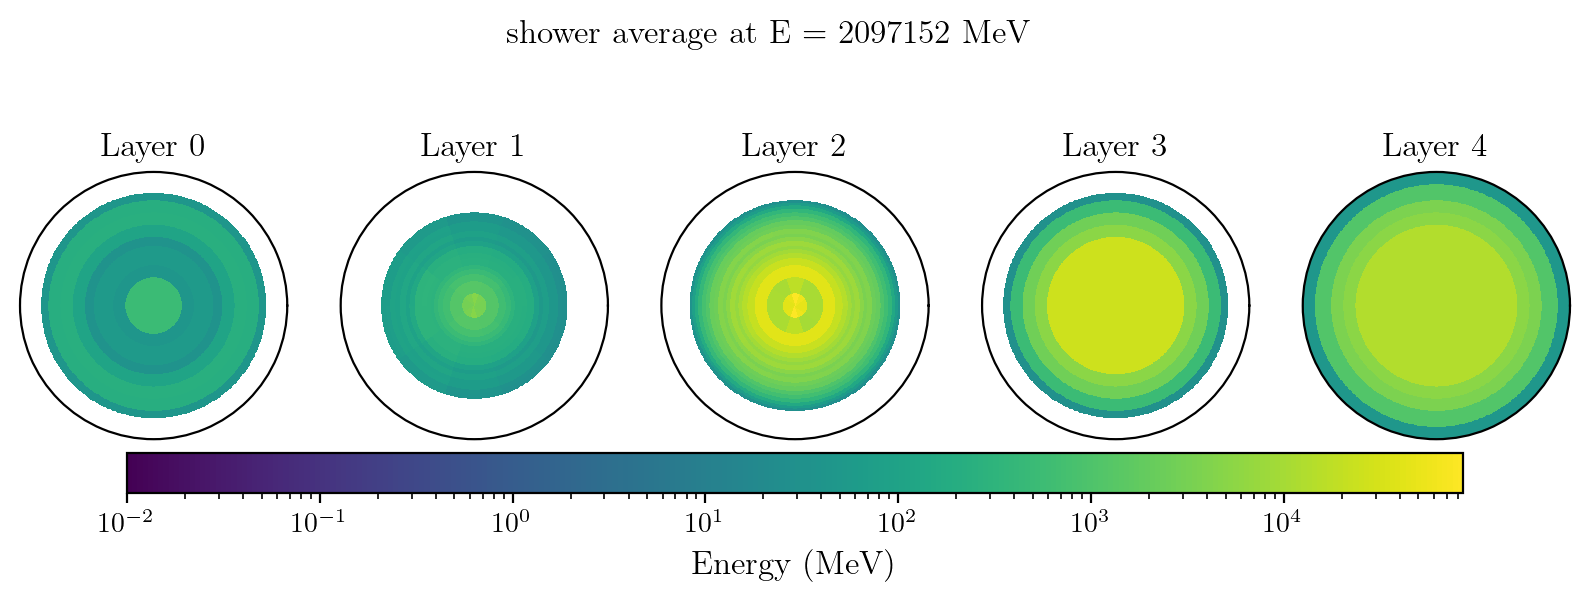

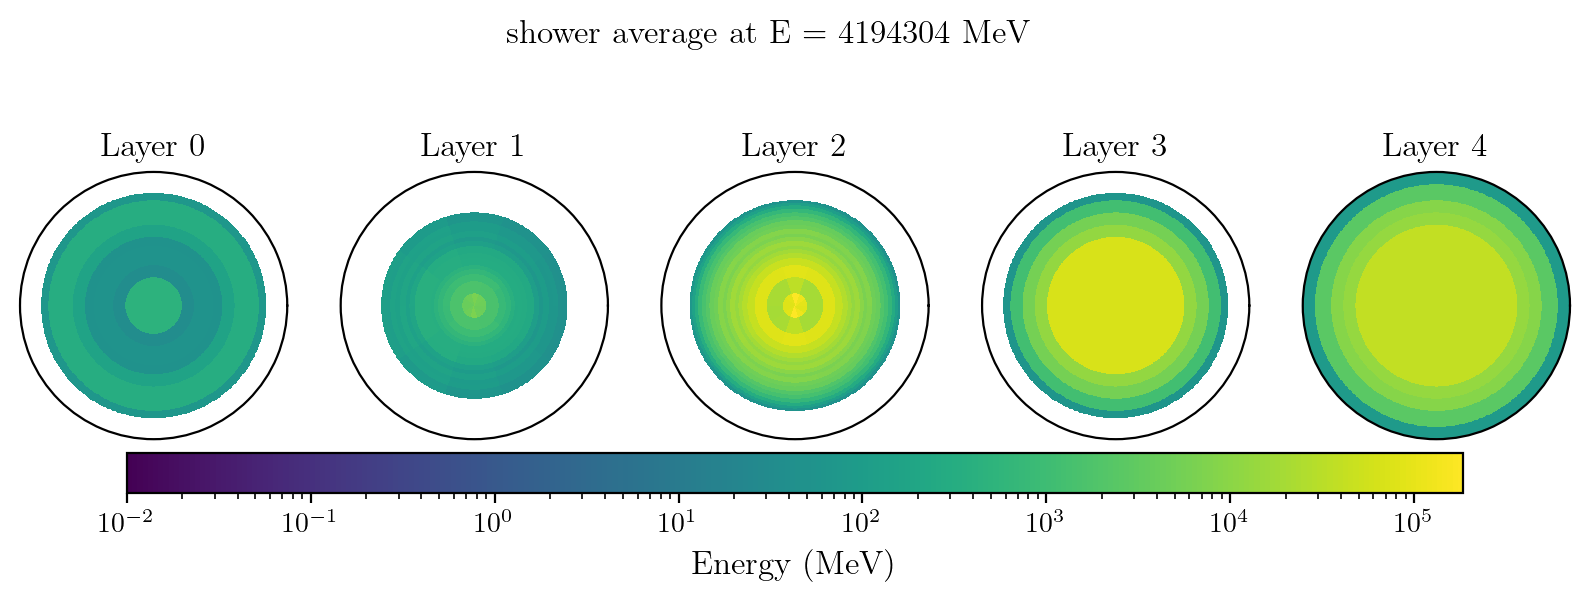

In [6]:
# evaluation mode 'avg-E': average showers at different energy ranges
print("Plotting average showers for different energies ...")
if '1' in args.dataset:
    target_energies = 2**np.linspace(8, 23, 16)
    plot_title = ['shower average at E = {} MeV'.format(int(en)) for en in target_energies]
else:
    target_energies = 10**np.linspace(3, 6, 4)
    plot_title = []
    for i in range(3, 7):
        plot_title.append('shower average for E in [{}, {}] MeV'.format(10**i, 10**(i+1)))
for i in range(len(target_energies)-1):
    filename = 'average_shower_dataset_{}_E_{}.png'.format(args.dataset,
                                                                   target_energies[i])
    which_showers = ((energy >= target_energies[i]) & (energy < target_energies[i+1])).squeeze()
    _ = hlf.DrawAverageShower(shower[which_showers],
                              filename=os.path.join(args.output_dir, filename),
                              title=plot_title[i])
print("Plotting average shower for different energies: DONE.\n")

In [7]:
# any further evaluation needs a reference dataset, check if that exists:
if evaluate.check_reference(args):
    print("Reference hdf5 file exist in {}, moving on.\n".format(args.source_dir))
else:
    # TODO: ask if download is ok and download
    raise FileNotFoundError("Reference hdf5 file does not exist in {}, please provide file {}".format(
        args.source_dir, 'reference_{}.hdf5'.format(args.dataset)))


Reference hdf5 file exist in source/, moving on.



In [8]:
# evaluation mode 'hist': plotting histograms of high-level features and printing/saving the sepration power
# (equivalent to running hist-p for plotting and hist-chi for the separation power)
print("Calculating high-level features for histograms ...")
hlf.CalculateFeatures(shower)
hlf.Einc = energy

print("Calculating high-level features for histograms: DONE.\n")
if evaluate.check_pickle(args):
    reference = evaluate.load_reference(args)
else:
    reference = evaluate.create_reference(args)
with open(os.path.join(args.output_dir, 'histogram_chi2_{}.txt'.format(args.dataset)), 'w') as f:
    f.write('List of chi2 of the plotted histograms, see eq. 15 of 2009.03796 for its definition.\n')

print("Plotting histograms ...")
evaluate.plot_histograms(hlf, reference, args)
print("Plotting histograms: DONE. \n")


Calculating high-level features for histograms ...
Calculating high-level features for histograms: DONE.

Loading file with high-level features.
Plotting histograms ...
Separation power of Etot / Einc histogram: 0.0004800638440243255
Separation power of E layer 0 histogram: 4.290030774676793e-05
Separation power of E layer 1 histogram: 4.967718942082463e-05
Separation power of E layer 2 histogram: 5.125581950424923e-05
Separation power of E layer 3 histogram: 5.7221852168978394e-05
Separation power of E layer 12 histogram: 6.151201894498012e-05
Separation power of EC Eta layer 1 histogram: 0.0003092400509266335
Separation power of EC Eta layer 2 histogram: 0.00048354573794114606
Separation power of EC Phi layer 1 histogram: 0.00035710512650981855
Separation power of EC Phi layer 2 histogram: 0.00039249449788039746
Separation power of Width Eta layer 1 histogram: 0.00043222221559481913
Separation power of Width Eta layer 2 histogram: 0.0003938647834979017
Separation power of Width Phi l